In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [67]:
crime = pd.read_csv('crime.csv')
codes = pd.read_csv('offense_codes.csv')


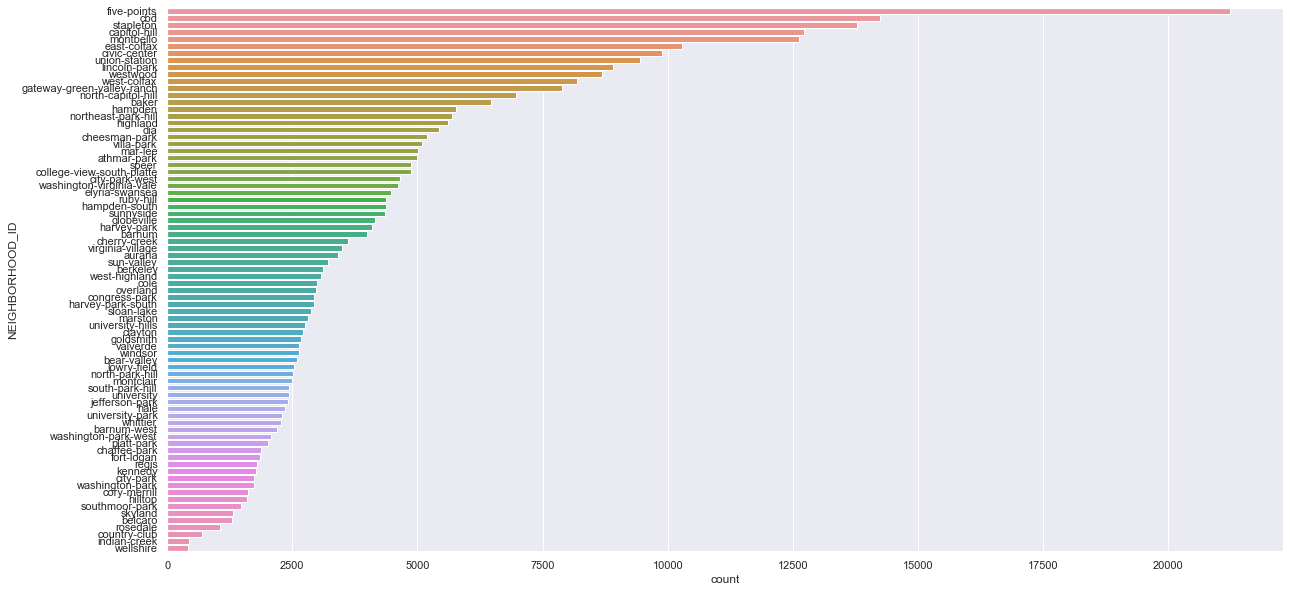

In [34]:
crime = crime[crime.IS_CRIME != 0]
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='NEIGHBORHOOD_ID', data=crime, order=crime['NEIGHBORHOOD_ID'].value_counts().index)

In [4]:
crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,2019816441,2019816441131300,1313,0,assault-simple,other-crimes-against-persons,12/29/2019 9:30:00 AM,NaN,12/29/2019 11:27:00 AM,1130 PARK AVEW,3143939.0,1700198.0,-104.988056,39.754735,6,611,five-points,1,0
466834,2019773667,2019773667220200,2202,0,burglary-residence-by-force,burglary,11/14/2019 6:00:00 AM,12/8/2019 12:12:00 AM,12/8/2019 12:12:00 AM,5425 E DAKOTA AVE,3162142.0,1683837.0,-104.923685,39.709522,3,322,washington-virginia-vale,1,0
466835,2019760688,2019760688230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,11/30/2019 12:01:00 AM,11/30/2019 11:59:00 PM,12/2/2019 9:46:00 AM,7604 E 28TH AVE,3168830.0,1700705.0,-104.899517,39.755709,5,512,stapleton,1,0
466836,2019766601,2019766601410400,4104,0,liquor-possession,drug-alcohol,12/4/2019 8:35:00 PM,NaN,12/4/2019 11:17:00 PM,2000 BLOCK E COLFAX AVE,3150981.0,1694664.0,-104.963127,39.739432,6,622,cheesman-park,1,0


In [5]:
crime_and_code = pd.merge(crime, codes, on= 'OFFENSE_CODE')

In [6]:
crime_and_code = crime_and_code.drop(['OFFENSE_CODE_EXTENSION_x', 'FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE','INCIDENT_ADDRESS', 'IS_CRIME_x', 'IS_TRAFFIC_x', 'OFFENSE_CODE_EXTENSION_y'
                                     , 'OFFENSE_TYPE_ID_y', 'OFFENSE_CATEGORY_ID_y', 'IS_TRAFFIC_y'], axis=1)


In [7]:
crime_and_code

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME,IS_CRIME_y
0,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
1,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,Flourishing of a weapon,All Other Crimes,1
2,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
3,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,Flourishing of a weapon,All Other Crimes,1
4,201866465,201866465521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 4:26:00 PM,3189748.0,1714526.0,-104.824755,39.793246,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806164,2016245433,2016245433399000,3990,gambling-betting-wagering,white-collar-crime,4/20/2016 7:08:00 PM,3144130.0,1694794.0,-104.987485,39.739897,6,611,civic-center,Gambling - betting or wagering,White Collar Crime,1
806165,2019356360,2019356360399000,3990,gambling-betting-wagering,white-collar-crime,6/7/2019 7:30:00 PM,3144179.0,1694556.0,-104.987316,39.739243,6,623,capitol-hill,Gambling - betting or wagering,White Collar Crime,1
806166,2015649351,2015649351530300,5303,riot,public-disorder,11/5/2015 8:48:00 PM,3144156.0,1694853.0,-104.987391,39.740059,6,611,civic-center,Engaging in a riot,Public Disorder,1
806167,20195003270,20195003270090700,907,homicide-police-by-gun,murder,8/15/2019 11:42:00 PM,3129652.0,1694777.0,-105.038967,39.740064,1,122,west-colfax,Homicide of a Police Officer w/gun,Murder,1


In [8]:
crime_and_code.groupby("INCIDENT_ID")

In [9]:
crime_and_code

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME,IS_CRIME_y
0,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
1,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,Flourishing of a weapon,All Other Crimes,1
2,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
3,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,Flourishing of a weapon,All Other Crimes,1
4,201866465,201866465521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 4:26:00 PM,3189748.0,1714526.0,-104.824755,39.793246,5,521,montbello,Unlawful discharge of a weapon,All Other Crimes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806164,2016245433,2016245433399000,3990,gambling-betting-wagering,white-collar-crime,4/20/2016 7:08:00 PM,3144130.0,1694794.0,-104.987485,39.739897,6,611,civic-center,Gambling - betting or wagering,White Collar Crime,1
806165,2019356360,2019356360399000,3990,gambling-betting-wagering,white-collar-crime,6/7/2019 7:30:00 PM,3144179.0,1694556.0,-104.987316,39.739243,6,623,capitol-hill,Gambling - betting or wagering,White Collar Crime,1
806166,2015649351,2015649351530300,5303,riot,public-disorder,11/5/2015 8:48:00 PM,3144156.0,1694853.0,-104.987391,39.740059,6,611,civic-center,Engaging in a riot,Public Disorder,1
806167,20195003270,20195003270090700,907,homicide-police-by-gun,murder,8/15/2019 11:42:00 PM,3129652.0,1694777.0,-105.038967,39.740064,1,122,west-colfax,Homicide of a Police Officer w/gun,Murder,1


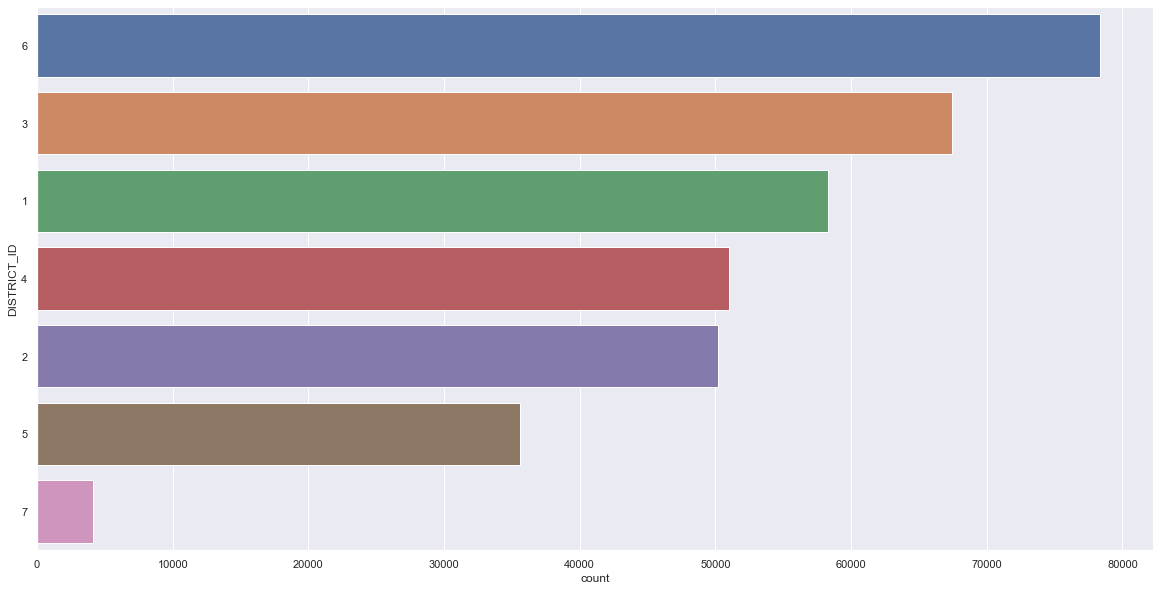

In [82]:
crime = crime[crime.IS_CRIME != 0]
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='DISTRICT_ID', data=crime, order=crime['DISTRICT_ID'].value_counts().index)

In [11]:
df1 = crime.loc[crime['DISTRICT_ID'] == 6]

In [12]:
df1

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
32,20186001018,20186001018230800,2308,0,theft-from-bldg,larceny,1/18/2018 2:00:00 PM,1/18/2018 3:00:00 PM,1/30/2018 11:22:00 AM,1223 N LAFAYETTE ST,3148817.0,1693288.0,-104.970850,39.735689,6,622,cheesman-park,1,0
35,2017510328,2017510328131500,1315,0,aggravated-assault,aggravated-assault,8/1/2017 8:34:00 PM,NaN,8/1/2017 8:34:00 PM,16TH ST / CLEVELAND PL,3144028.0,1695494.0,-104.987834,39.741821,6,611,cbd,1,0
39,201872530,201872530100600,1006,0,kidnap-adult-victim,all-other-crimes,1/30/2018 8:00:00 PM,1/30/2018 10:00:00 PM,1/31/2018 12:29:00 AM,NaN,3142260.0,1694903.0,-104.994132,39.740226,6,611,cbd,1,0
47,2017791814,2017791814131300,1313,0,assault-simple,other-crimes-against-persons,11/25/2017 6:30:00 PM,11/26/2017 6:00:00 AM,11/26/2017 12:30:00 PM,1920 N HIGH ST,3150617.0,1697154.0,-104.964369,39.746273,6,622,city-park-west,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466827,2019801723,2019801723549902,5499,2,vehicular-eluding-no-chase,all-other-crimes,12/21/2019 12:35:00 AM,NaN,12/21/2019 12:35:00 AM,W 10TH AVE / N ACOMA ST,3143761.0,1691936.0,-104.988854,39.732058,6,611,civic-center,1,0
466828,2019803259,2019803259570700,5707,0,criminal-trespassing,all-other-crimes,12/21/2019 8:23:00 PM,NaN,12/21/2019 10:31:00 PM,1499 N BROADWAY ST,3144130.0,1694794.0,-104.987485,39.739897,6,611,civic-center,1,0
466833,2019816441,2019816441131300,1313,0,assault-simple,other-crimes-against-persons,12/29/2019 9:30:00 AM,NaN,12/29/2019 11:27:00 AM,1130 PARK AVEW,3143939.0,1700198.0,-104.988056,39.754735,6,611,five-points,1,0
466836,2019766601,2019766601410400,4104,0,liquor-possession,drug-alcohol,12/4/2019 8:35:00 PM,NaN,12/4/2019 11:17:00 PM,2000 BLOCK E COLFAX AVE,3150981.0,1694664.0,-104.963127,39.739432,6,622,cheesman-park,1,0


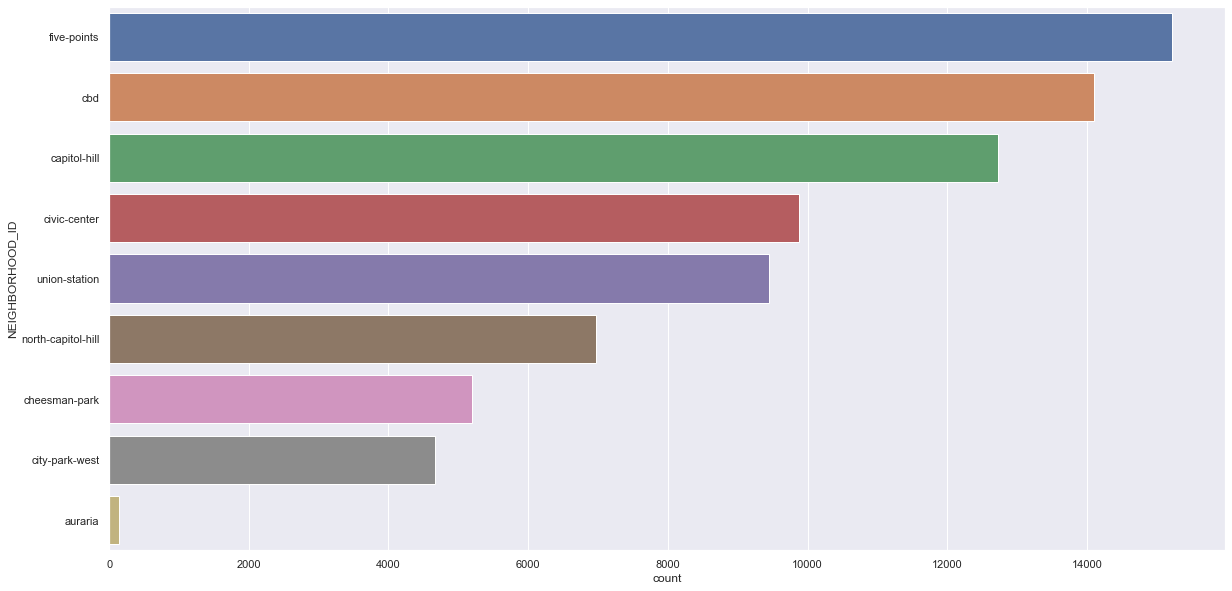

In [13]:
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='NEIGHBORHOOD_ID', data=df1, order=df1['NEIGHBORHOOD_ID'].value_counts().index)

In [14]:
crime.dtypes

INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                     float64
GEO_Y                     float64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                 int64
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

In [ ]:
crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str.split(' ').str[0]

In [77]:
crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str[-4:]

In [78]:
crime['REPORTED_DATE'].unique()

array(['2016', '2018', '2017', '2019', '2015', '2020'], dtype=object)

In [119]:
indexNames = crime[crime['REPORTED_DATE']== '2020'].index
crime.drop(indexNames, inplace=True)

In [120]:
crime['REPORTED_DATE'].unique()

array(['2016', '2018', '2017', '2019', '2015'], dtype=object)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
78837,2015318182,2015318182299900,2999,0,criminal-mischief-other,public-disorder,6/5/2015 9:30:00 AM,6/5/2015 3:30:00 PM,2015,5145 E MEXICO AVE,3160960.0,1675232.0,-104.928078,39.685920,3,322,virginia-village,1,0
82178,2015335326,2015335326240400,2404,0,theft-of-motor-vehicle,auto-theft,6/13/2015 3:16:00 AM,NaN,2015,1300 BLOCK N SHERIDAN BLVD,3125744.0,1693611.0,-105.052884,39.736917,1,122,west-colfax,1,0
82177,2015335307,2015335307220400,2204,0,burglary-residence-no-force,burglary,6/16/2015 1:30:00 PM,6/16/2015 3:30:00 PM,2015,3001 N FOREST ST,3160981.0,1702348.0,-104.927396,39.760358,2,221,north-park-hill,1,0
82176,2015335288,2015335288131300,1313,0,assault-simple,other-crimes-against-persons,6/16/2015 4:30:00 PM,6/16/2015 5:10:00 PM,2015,NaN,3174154.0,1689447.0,-104.880855,39.724706,3,321,lowry-field,1,0
82173,2015335263,2015335263230300,2303,0,theft-shoplift,larceny,6/15/2015 7:00:00 PM,NaN,2015,3100 S SHERIDAN BLVD,3125925.0,1663633.0,-105.052765,39.654618,4,423,harvey-park-south,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232461,2019603063,2019603063360500,3605,0,indecent-exposure,other-crimes-against-persons,9/19/2019 4:52:00 PM,NaN,2019,NaN,3212540.0,1715363.0,-104.743625,39.795051,5,523,gateway-green-valley-ranch,1,0
232460,2019605083,2019605083299901,2999,1,criminal-mischief-mtr-veh,public-disorder,9/21/2019 2:00:00 PM,NaN,2019,NaN,3143108.0,1683601.0,-104.991342,39.709186,3,312,baker,1,0
232458,2019604745,2019604745299900,2999,0,criminal-mischief-other,public-disorder,9/21/2019 10:15:00 AM,NaN,2019,NaN,3134531.0,1678628.0,-105.021920,39.695662,4,422,ruby-hill,1,0
232471,2019602586,2019602586220400,2204,0,burglary-residence-no-force,burglary,9/11/2019 8:00:00 AM,9/20/2019 1:00:00 PM,2019,1291 N FAIRFAX ST,3160759.0,1693604.0,-104.928382,39.736358,2,222,hale,1,0


array(['2016', '2018', '2017', '0179', '0178', '0175', '0167', '0161',
       '0171', '0183', '0181', '0166', '0187', '0186', '0184', '0169',
       '0174', '0168', '0182', '0164', '0172', '0162', '0176', '0173',
       '0189', '0185', '0188', '0165', '2019', '0155', '0177', '2015',
       '0191', '0195', '0193', '0196', '0197', '0199', '0194', '0192',
       '0198', '0201', '0203', '0208', '0209', '0206', '0202', '0204',
       '0205', '0207', '2020', '0151', '0158', '0159', '0152', '0156',
       '0153', '0154', '0157', '0163'], dtype=object)